<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Komputasi Eksplorasi menggunakan Python
*Oleh Mark Bakker*

##  *Notebook* Statistik 3: Distribusi nilai rata-rata, pengujian hipotesis, dan teorema limit sentral
Dalam *notebook* ini pertama-tama kita akan menginvestigasi distribusi nilai rata-rata sebuah dataset, kemudian kita akan membuat simulasi beberapa pengujian hipotesis, dan ditutup dengan menyelidiki teorema limit sentral.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

Perhatikanlah sebuah data set dengan 100 poin data. Data tersebut diambil dari distribusi normal dengan nilai rata-rata (*mean*) 4 dan standar deviasi 2. Seperti yang telah kita lihat sebelumnya, nilai rata-rata sampel dari 100 poin data hampir selalu berbeda dari 4. Dan, setiap kali kita membuat sebuah set baru dengan 100 poin data, nilai rata-ratanya juga akan berbeda.

In [18]:
for i in range(5):
    a = 2 * rnd.standard_normal(100) + 4
    print('nilai rata-rata a: ', np.mean(a))

nilai rata-rata a:  4.06127165222
nilai rata-rata a:  4.06109246056
nilai rata-rata a:  4.13779612828
nilai rata-rata a:  3.95884004367
nilai rata-rata a:  4.1136581844


Sebenarnya, nilai rata-rata dataset tersebut dapat dianggap sebagai variabel acak dengan distribusinya sendiri.

###Contoh Standar Deviasi
Contoh standar deviasi $s_n$ dari sebuah dataset dengan nilai $n$ dapat didefinisikan sebagai:

$s_n = \sqrt{ \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x}_n)^2 }$
`numpy`
dan dapat dihitung dengan fungsi `std` dari paket `numpy`. Sesuai pengaturan standar, fungsi `std` membagi jumlah data dengan $n$, bukan dengan $n-1$. Untuk membaginya dengan $n-1$, karena tentu saja kita menginginkan estimasi yang tidak bias dari standar deviasi, tentukanlah argumen kata kunci `ddof=1` dalam fungsi `std`.

###Latihan 1. <a name="back1"></a>Histogram dari nilai rata-rata dataset dengan 100 nilai 

Susunlah 1000 dataset, masing-masing memiliki 100 nilai yang diambil dari distribusi normal dengan nilai rata-rata 4 dan standar deviasi 2; gunakanlah *seed* 22. Hitunglah nilai rata-rata tiap dataset dan simpanlah nilai tersebut di dalam sebuah array dengan panjang 1000. Hitunglah nilai rata-rata dari seluruh nilai rata-rata tersebut beserta standar deviasinya, kemudian tampilkanlah nilai tersebut ke layar. Gambarlah sebuah *boxplot* dari nilai  rata-rata tersebut. Kemudian, dalam figur yang terpisah, buatlah sebuah histogram dari kumpulan nilai rata-rata tersebut dan pastikan sumbu horizontalnya terbentang dari 3 sampai 5. Ingatlah kembali bahwa Anda dapat memulai figur baru dengan menggunakan fungsi `figure()`.

<a href="#ex1answer">Kunci Jawaban Latihan 1</a>

###Latihan 2. <a name="back2"></a>Histogram dari nilai rata-rata dataset dengan 1000 nilai

Ulanglah pengerjaan Latihan 1 dengan membuat 1000 dataset, tetapi untuk sekarang masing-masing dataset memiliki 1000 nilai (bukan 100 nilai lagi), yang diambil dari distribusi normal yang sama dengan nilai rata-rata 4 dan standar deviasi 2, dan juga dengan *seed* 22. Pastikan bahwa limit untuk sumbu horizontal histogram terbentang dari 3 sampai 5, sehingga histogram tersebut dapat dibandingkan dengan histogram yang Anda buat sebelumnya. Apakah persebaran nilai rata-rata tersebut lebih kecil jika dibandingkan dengan dataset sebelumnya yang hanya berisikan 100 nilai?

<a href="#ex2answer">Kunci Jawaban Latihan 2</a>

###Standar deviasi sampel dari nilai rata-rata sampel tersebut

Histogram dari seluruh nilai rata-rata akan terlihat seperti kurva bel dari distribusi normal, namun jika Anda melihat dan mengingat kembali, histogram tersebut sebenarnya berbentuk distribusi Student's $t$, yang lebih sering disebut distribusi-$t$. Sebuah distribusi-$t$ muncul ketika kita ingin membuat estimasi dari nilai rata-rata sebuah variabel yang terdistribusi normal pada kondisi di mana besar sampel relatif lebih kecil dan standar deviasi tidak diketahui (karena biasanya memang selalu seperti itu), serta perlu diestimasi dari datanya.

Sampel nilai rata-rata dari dataset dengan nilai $n$ seringkali ditulis sebagai $\overline{x}_n$, di mana standar deviasi dari standar tersebut ditulis sebagai $s_n$ (seperti yang telah didefinisikan di atas). Di sini, kita akan menghitung standar deviasi dari nilai rata-rata sampel, yang kita tulis sebagai $\hat{s}_n$ dari dataset dengan ukuran $n$. Secara teori, nilai standar deviasi dari nilai rata-rata sampel $\hat{s}_n$ berhubungan dengan standar deviasi sampel, seperti yang dikemukakan berikut (lihat [di sini](http://en.wikipedia.org/wiki/Standard_deviation#Standard_deviation_of_the_mean)).

$\hat{s}_n = s_n / \sqrt{n}$

###Persentil dari distribusi-$t$

Anda dapat mengingat kembali bahwa 90% interval di sekeliling nilai rata-rata dari variabel yang terdistribusi normal biasanya memroses $\mu-1.64\sigma$ sampai $\mu+1.64\sigma$. Dengan kata lain, 5% dari jumlah data akan berada di bawah $\mu-1.64\sigma$ dan 5% data akan berada di atas $\mu+1.64\sigma$. Bagaimana jika Anda lupa bahwa kondisi tersebut berarti $1.64\sigma$ ke kanan dan kiri dari nilai rata-rata? Atau bagaimana jika Anda ingin mengetahui nilai dari persentil yang lain? Anda dapat melihatnya dalam tabel dalam buku statistik (atau dari web), atau menggunakan fungsi persentase poin `ppf`, yang merupakan bagian dari seluruh fungsi distribusi statistik yang didefinisikan di dalam paket `scipy.stats`. Fungsi `ppf` merupakan invers atau kebalikan dari fungsi distribusi kumulatif. Sebagai contoh, `ppf(0.05)` mengembalikan nilai dari data sedemikian sehingga fungsi distribusi kumulatifnya sama dengan 0.05 dalam hal pengembalian nilai. Untuk mencari nilai 5% dan 95%, ketiklah seperti di bawah ini (ingatlah bahwa secara pengaturan standar, distribusi `norm` memiliki nilai rata-rata nol dan standar deviasi 1; Anda dapat menentukan nilai yang berbeda dengan menggunakan argumen kata kunci untuk `loc` dan `scale`, masing-masing secara berurutan).

In [19]:
from scipy.stats import norm
xvalue_05 = norm.ppf(0.05)
xvalue_95 = norm.ppf(0.95)
print('Limit 5%: ',xvalue_05)
print('Limit 95%: ',xvalue_95)
print('cek jika distribusi berhasil untuk 5%:  ',norm.cdf( xvalue_05 ))
print('cek jika distribusi berhasil untuk 95%: ',norm.cdf( xvalue_95 ))
# Selanjutnya, tentukan nilai rata-rata dan standar deviasi
xvalue_05_musig = norm.ppf(0.05, loc = 20, scale = 10) # mu = 20, sigma = 10
print('Limit 5% dengan mu=20, sig=10: ',xvalue_05_musig)
print('cek: ',norm.cdf(xvalue_05_musig, loc = 20, scale = 10))

Limit 5%:  -1.64485362695
Limit 95%:  1.64485362695
cek jika distribusi berhasil untuk 5%:   0.05
cek jika distribusi berhasil untuk 95%:  0.95
Limit 5% dengan mu=20, sig=10:  3.55146373049
cek:  0.05


Fungsi yang sama juga terlihat pada distribusi-$t$ . Distribusi-$t$ mengambil satu argumen tambahan: angka derajat kebebasan, yang sama dengan nilai poin data dikurangi 1. Sebagai contoh, perhatikan sampel dengan 40 poin data, nilai sampel tersebut 20, dan standar deviasi sampel tersebut 2, maka nilai persentil 5 dan 95 adalah:

In [21]:
from scipy.stats import t
xvalue_05 = t.ppf(0.05, 39, loc=20, scale=2)
xvalue_95 = t.ppf(0.95, 39, loc=20, scale=2)
print('Limit 5%:  ',xvalue_05)
print('Limit 95%: ',xvalue_95)
print('cek jika distribusi berhasil untuk 5%:  ',t.cdf( xvalue_05, 39, loc=20, scale=2 ))
print('cek jika distribusi berhasil untuk 95%: ',t.cdf( xvalue_95, 39, loc=20, scale=2 ))

Limit 5%:   16.630249761
Limit 95%:  23.369750239
cek jika distribusi berhasil untuk 5%:   0.0500000002153
cek jika distribusi berhasil untuk 95%:  0.949999999785


###Latihan 3. <a name="back3"></a>Hitunglah besarnya nilai rata-rata di luar persentil 95

Kembalilah ke Latihan 1. Buatlah 1000 dataset dengan masing-masing 100 nilai yang diambil dari distribusi normal dengan nilai rata-rata 4 dan standar deviasi 2; gunakan *seed* 22. Untuk tiap dataset, periksalah apakah nilai rata-rata sampel berada di dalam persentil 95 dari distribusi-$t$ di sekitar nilai rata-rata sebenarnya, yaitu 4 (standar deviasi dari nilai rata-rata sampel berubah setiap waktu, tentu saja). Hitunglah berapa kali nilai rata-rata sampel terlalu rendah sampai-sampai berada di bawah persentil 5 dari distribusi-$t$ di sekitar nilai rata-rata sebenarnya. Jika teori ini terbukti benar, seharusnya, tentu saja, kasus ini berlaku untuk 5% dari seluruh dataset yang ada. Dengan demikian, cobalah beberapa *seed* yang sedikit berbeda.

<a href="#ex3answer">Kunci Jawaban Latihan 3</a>

###Latihan 4. <a name="back4"></a>pengujian $t$ pada dataset dengan 20 nilai

Buatlah 20 poin data dari distribusi normal dengan nilai rata-rata 39 dan standar deviasi 4. Gunakan *seed* 2. Hitung dan laporkan nilai rata-rata dan standar deviasi dari dataset dan standar deviasi dari nilai rata-ratanya.

Jika Anda menghitung dengan benar, nilai rata-rata dari 20 poin data di atas adlah 38.16. Seseorang dapat saja mengklaim bahwa 20 poin data tersebut diambil dari sebuah distribusi dengan nilai rata-rata 40. Anda diminta untuk memutuskan apakah nilai rata-rata yang sebenarnya adalah betul-betul 40. Menurut istilah statistik, Anda diminta untuk melakukan pengujian hipotesis, menguji hipotesis nol bahwa nilai rata-rata dataset tersebut adalah 40m dan dibandingkan dengan hipotesis alternatif yang menyatakan bahwa nilai rata-rata tersebut tidak tepat 40, tetapi berada dalam level kepentingan 5%. Oleh karena itu, Anda diajak untuk melakukan pengujian-$t$ untuk kedua sisi.

Yang dapat Anda lakukan dalam pengujian hipotesis adalah mencoba menolak hipotesis nol, jadi mari kita coba juga cara tersebut. Hampir seluruh buku statistik memberikan resep-resep praktis untuk melakukan pengujian-$t$. Di sini kita akan memvisualisasikan pengujian-$t$.Kita menolak hipotesis nol jika nilai rata-rata sampel berada di luar interval 95% di sekitar nilai rata-rata distribusi-$t$ yang bersesuaian. Jika nilai rata-rata tersebut berada di dalam interval 95%, kita hanya dapat menyimpulkan bahwa tidak ada bukti yang cukup untuk menolak hipotesis nol. Buatlah fungsi probabilitas kepadatan dari distribusi-$t$ dengan nilai rata-rata 40 dan standar deviasi yang bernilai sama dengan standar deviasi nilai rata-rata sampel yang Anda telah Anda hitung sebelumnya. Gambarlah garis merah vertikal yang memperlihatkan limit kiri dan kanan dari interval 95% di sekeliling nilai rata-rata. Gambarlah juga garis hitam vertikal yang tebal pada posisi nilai rata-rata sampel yang telah Anda hitung sebelumnya. Putuskanlah apakah Anda dapat menolak hipotesis nol saat nilai rata-ratanya 40 dan apakah perlu dimasukkan sebagai judul dari figur tersebut.

<a href="#ex4answer">Kunci Jawaban Latihan 4</a>

###Latihan 5. <a name="back5"></a>Pengujian hipotesis pada data balok kayu

Muatlah sebuah dataset dari percobaan balok kayu yang disimpan dalam file `douglas_data.csv`. Pertama, perhatian 20 pengukuran pertama dari kekuatan tekuknya. Hitung nilai rata-rata sampel dan standar deviasi dari nilai rata-rata sampel. Produsen balok kayu tersebut mengklaim bahwa nilai rata-rata kekuatan tekuk balok hanya 50 Pa. Lakukanlah pengujian-$t$ (level kepentingan 5%) dengan hipotesis nol yang berarti nilai rata-rata benar-benar 50 Pa dan hipotesis alternatif yang berarti nilai rata-rata bukan 50 Pa dengan menggunakan pendekatan yang telah diaplikasikan sebelumnya pada Latihan 4.

Ulangi pengujian-$t$ di atas, tetapi sekarang lakukanlah dengan menggunakan seluruh pengukuran untuk kekuatan tekuk. Apakah kesimpulan Anda tetap sama seperti sebelumnya?

<a href="#ex5answer">Kunci Jawaban Latihan 5</a>

###Teorema Limit Sentral

Sejauh ini kita melihat distribusi dari nilai rata-rata sampel untuk sebuah dataset di saat kita tah bahwa data tersebut diambil dari distribusi normal (kecuali untuk data balok kayu, meksipun datanya betul-betul terlihat seperti distribusi normal. Nilai rata-rata sampel memiliki distribusi student-$t$, yang didekati dengan distribusi normal ketika datasetnya terlalu besar. Dengan demikian, poin data sebanyak 100 buah memang sudah cukup untuk mendekati distribusi normal secara tepat. Anda dapat mengeceknya dengan cara membandingkan, contohnya, fungsi persentase poin `ppf` dari distribusi normal melalui distribusi-$t$ dengan 99 derajat kebebasan, atau hanya dengan membuat plot pdf dari kedua distribusi:

Persentil 95 standar normal:   1.64485362695
95 percentile t-dist dengan n=99:  1.660391156


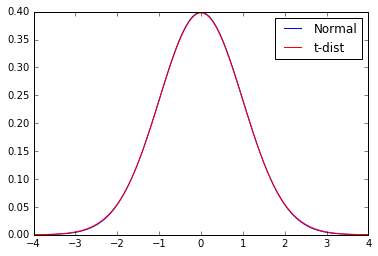

In [22]:
print('Persentil 95 standar normal:  ',norm.ppf(0.95))
print('95 percentile t-dist dengan n=99: ',t.ppf(0.95,99)) 
x = np.linspace(-4,4,100)
y1 = norm.pdf(x)
y2 = t.pdf(x,99)
plt.plot(x,y1,'b',label='Normal')
plt.plot(x,y2,'r',label='t-dist')
plt.legend()

Teorema limit sentral sekarang menyatakan bahwa distribusi nilai rata-rata sampel mendekati distribusi normal dalam limit tertentu bahkan jika dataset yang dimiliki terambil dari distribusi yang benar-benar berbeda! Kita akan menguji teroma ini dengan cara memasukkan angka-angka ke dalam distribusi Gamma. Distribusi Gamma adalah jenis distribusi yang miring atau condong dan mengambil bentuk parameter  $k$, juga merupakan parameter berskala $\theta$, serta didefinisikan untuk $x>0$. Detail distribusi Gamma dapat ditemukan, sebagai contoh [di sini](http://en.wikipedia.org/wiki/Gamma_distribution). Marilah kita pilih  parameter bentuk yang sama dengan 2 dan parameter skala yang sama dengan 1 (yang menjadi pengaturan dasar atau *default*). Saat parameter skala sama dengan 1, nilali rata-rata akan sama dengan parameter bentuk. PDF dari distribusi Gamma untuk nilai-nilai tersebut dapat dilihat seperti dibawah ini. Nilai rata-ratanya diindikasikan dengan garis merah vertikal.

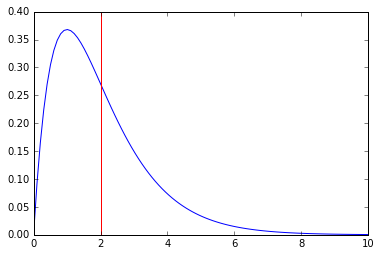

In [6]:
from scipy.stats import gamma
x = np.linspace(1e-6,10,100)
y = gamma.pdf(x,2,scale=1)
plt.plot(x,y)
plt.axvline(2,color='r')

Nilai-nilai acak dapat digambarkan dari distribusi manapun dalam paket `scipy.stats` melalui fungsi `rvs`. Di sini, kita mengambil 1000 angka dan menambahkan histogramnya ke figur sebelumnya.

(array([ 0.17210643,  0.30290732,  0.35798137,  0.36716038,  0.27078078,
         0.21111722,  0.17899069,  0.12850613,  0.06884257,  0.06884257,
         0.06195831,  0.02753703,  0.02524228,  0.01147376,  0.01376851,
         0.00917901,  0.00917901,  0.00229475,  0.00229475,  0.0045895 ]),
 array([ 0.01783081,  0.45360768,  0.88938454,  1.32516141,  1.76093827,
         2.19671513,  2.632492  ,  3.06826886,  3.50404573,  3.93982259,
         4.37559946,  4.81137632,  5.24715319,  5.68293005,  6.11870692,
         6.55448378,  6.99026065,  7.42603751,  7.86181437,  8.29759124,
         8.7333681 ]),
 <a list of 20 Patch objects>)

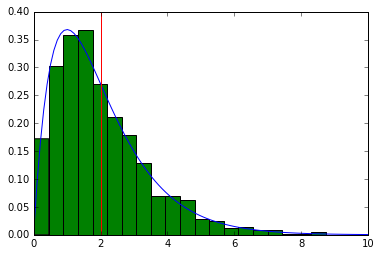

In [7]:
x = np.linspace(1e-6,10,100)
y = gamma.pdf(x,2)
plt.plot(x,y)
plt.axvline(2, color='r')
data = gamma.rvs(2, size=1000)
plt.hist(data, bins=20, normed=True)

###Latihan 6. <a name="back6"></a>Selidiki Teorema Limit Sentral untuk Distribusi Gamma

Buatlah $t$ dataset dengan jumlah 20 nilai acak yang diambil dari distribusi gamma dengan parameter yang sama dengan 2 dan skala yang sama dengan 1. Buatlah histogram dari nilai rata-rata $N$ dataset dengan menggunakan 20 bin. Dalam grafik yang sama, buatlah PDF dari distribusi normal dengan menggunakan nilai rata-rata dari nilai rata-rata sampel dan standar deviasi sampel; pilihlah limit dari sumbu-$x$ di atnara 0 dan 4. Buatlah 3 grafik, untuk $N=100,1000,10000$ dan melihat bahwa distribusi tersebut mulai mendekati distribusi normal. Tambahkan judul untuk tiap grafik yang menyatakan jumlah angka dari tiap dataset tersebut.

<a href="#ex6answer">Kunci Jawaban Latihan 6</a>

###Kunci Jawaban Latihan-latihan

<a name="ex1answer">Kunci Jawaban Latihan 1</a>

Nilai rata-rata adalah:  4.00474211854
Standar deviasi data adalah: 0.190485481767


(3, 5)

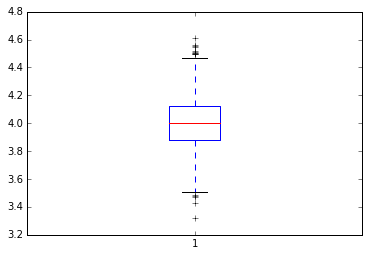

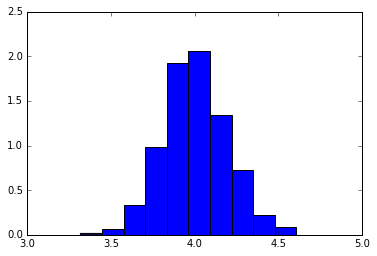

In [23]:
rnd.seed(22)
mean_of_data = np.mean( 2.0 * rnd.standard_normal((1000,100)) + 4.0, 1 )
print('Nilai rata-rata adalah: ', np.mean(mean_of_data))
print('Standar deviasi data adalah:', np.std(mean_of_data, ddof=1))
plt.figure()
plt.boxplot(mean_of_data)
plt.figure()
plt.hist(mean_of_data, normed=True)
plt.xlim(3,5)

<a href="#back1">Kembali ke Latihan 1</a>

<a name="ex2answer">Kunci Jawaban Latihan 2</a>

Nilai rata-rata dari nilai rata-rata sampel adalah:  4.00128131235
Standar deviasi dari nilai rata-rata sampel:  0.0654148250988


(3, 5)

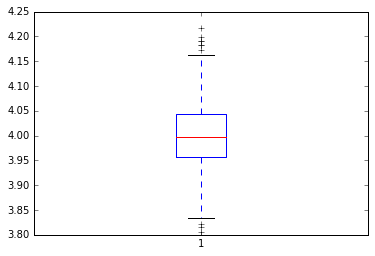

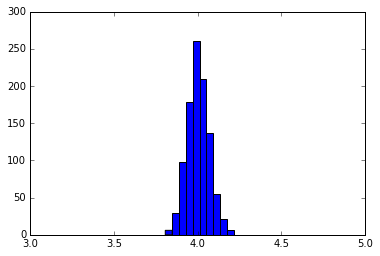

In [9]:
rnd.seed(22)
mean_of_data = np.mean( 2.0 * rnd.standard_normal((1000,1000)) + 4.0, 1 )
print('Nilai rata-rata dari nilai rata-rata sampel adalah: ', np.mean(mean_of_data))
print('Standar deviasi dari nilai rata-rata sampel: ', np.std(mean_of_data, ddof=1))
plt.figure()
plt.boxplot(mean_of_data)
plt.figure()
plt.hist(mean_of_data)
plt.xlim(3,5)

<a href="#back2">Kembali ke Latihan 2</a>

<a name="ex3answer">Kunci Jawaban Latihan 3</a>

In [10]:
from scipy.stats import t
for s in [22,32,42,52,62]:
    rnd.seed(s)
    data = 2.0 * rnd.standard_normal((1000,100)) + 4.0
    mean_of_data = np.mean( data, 1 )
    std_of_mean_of_data = np.std( data, 1, ddof = 1 ) / np.sqrt(100)
    fivepercentile = t.ppf(0.05, 99)
    outside = mean_of_data < 4.0 + std_of_mean_of_data * fivepercentile
    print('Jumlah dataset di mana nilai rata-rata sampel di atas persentil 95: ', np.sum( outside ))

Jumlah dataset di mana nilai rata-rata sampel di atas persentil 95:  37
Jumlah dataset di mana nilai rata-rata sampel di atas persentil 95:  42
Jumlah dataset di mana nilai rata-rata sampel di atas persentil 95:  56
Jumlah dataset di mana nilai rata-rata sampel di atas persentil 95:  60
Jumlah dataset di mana nilai rata-rata sampel di atas persentil 95:  48


<a href="#back3">Kembali ke Latihan 3</a>

<a name="ex4answer">Kunci Jawaban Latihan 4</a>

In [24]:
rnd.seed(2)
data = 4 * rnd.standard_normal(20) + 39
mu = np.mean(data)
sig = np.std(data, ddof=1)
sighat = np.std(data, ddof=1) / np.sqrt(20)
print('nilai rata-rata data: ', mu)
print('standar deviasi data: ', sig)
print('standar deviasi nilai rata-rata: ', sighat)

nilai rata-rata data:  38.1627400469
standar deviasi data:  4.46032692087
standar deviasi nilai rata-rata:  0.997359419693


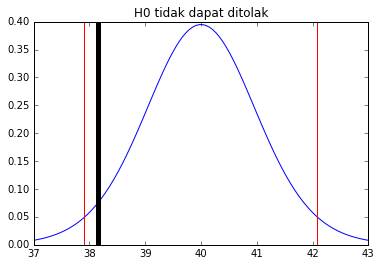

In [12]:
x = np.linspace(37,43,100)
y = t.pdf(x, 19, loc=40, scale=sighat)
plt.plot(x,y)
perc025 = t.ppf(0.025, 19, loc = 40, scale = sighat)
perc975 = t.ppf(0.975, 19, loc = 40, scale = sighat)
plt.axvline(perc025,color='r')
plt.axvline(perc975,color='r')
plt.axvline(mu,color='k',lw=5)
plt.title('H0 tidak dapat ditolak')

<a href="#back4">Kembali ke Latihan 4</a>

<a name="ex5answer">Kunci Jawaban Latihan 5</a>

Sampel nilai rata-rata, standar deviasi dari nilai rata-rata:  48.650505618 0.903543631702


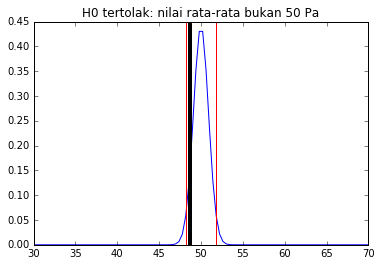

In [27]:
from pandas import read_csv
w = read_csv('douglas_data.csv',skiprows=[1],skipinitialspace=True)
N = len(w.bstrength)
mu = np.mean(w.bstrength)
sig = np.std(w.bstrength, ddof=1) / np.sqrt(N)
print('Sampel nilai rata-rata, standar deviasi dari nilai rata-rata: ', mu, sig)
x = np.linspace(30,70,100)
y = t.pdf(x, N-1, loc=50, scale=sig)
plt.plot(x,y)
perc025 = t.ppf(0.025, N-1, loc = 50, scale = sig)
perc975 = t.ppf(0.975, N-1, loc = 50, scale = sig)
plt.axvline(perc025,color='r')
plt.axvline(perc975,color='r')
plt.axvline(mu,color='k',lw=4)
plt.title('H0 tertolak: nilai rata-rata bukan 50 Pa')

Sampel nilai rata-rata, standar deviasi dari nilai rata-rata:  48.650505618 0.903543631702


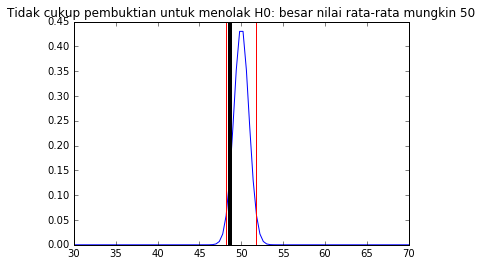

In [28]:
from pandas import read_csv
w = read_csv('douglas_data.csv',skiprows=[1],skipinitialspace=True)
N = len(w.bstrength)
mu = np.mean(w.bstrength)
sig = np.std(w.bstrength, ddof=1) / np.sqrt(N)
print('Sampel nilai rata-rata, standar deviasi dari nilai rata-rata: ', mu, sig)
x = np.linspace(30,70,100)
y = t.pdf(x, N-1, loc=50, scale=sig)
plt.plot(x,y)
perc025 = t.ppf(0.025, N-1, loc = 50, scale = sig)
perc975 = t.ppf(0.975, N-1, loc = 50, scale = sig)
plt.axvline(perc025,color='r')
plt.axvline(perc975,color='r')
plt.axvline(mu,color='k',lw=4)
plt.title('Tidak cukup pembuktian untuk menolak H0: besar nilai rata-rata mungkin 50')

<a href="#back5">Kembali ke Latihan 5</a>

<a name="ex6answer">Kunci Jawaban Latihan 6</a>

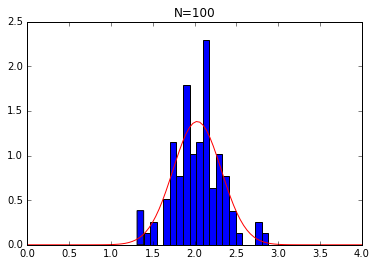

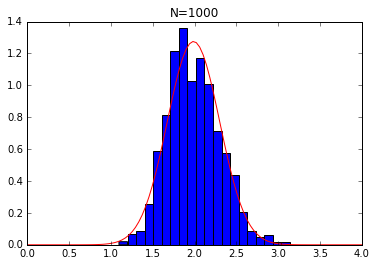

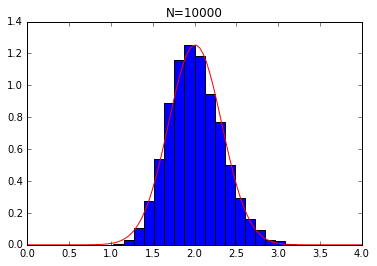

In [29]:
from scipy.stats import norm, gamma
for N in [100, 1000, 10000]:
    data = gamma.rvs(2,size=(N,20))
    mean_of_data = np.mean(data,1)
    mu = np.mean(mean_of_data)
    sig = np.std(mean_of_data,ddof=1)
    plt.figure()
    plt.hist(mean_of_data,bins=20,normed=True)
    x = np.linspace(0,4,100)
    y = norm.pdf(x,loc=mu,scale=sig)
    plt.plot(x,y,'r')
    plt.title('N='+str(N))

<a href="#back6">Kunci Jawaban Latihan 6</a>